# Creating Charts

In [1]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
file_data_pattern = 'data/crime/2020-*.csv'

file_list = []

for file in glob.glob(file_data_pattern):
    file_list.append(file)
file_list

['data/crime/2020-01-metropolitan-street.csv',
 'data/crime/2020-02-metropolitan-street.csv',
 'data/crime/2020-03-metropolitan-street.csv',
 'data/crime/2020-04-metropolitan-street.csv',
 'data/crime/2020-05-metropolitan-street.csv',
 'data/crime/2020-06-metropolitan-street.csv',
 'data/crime/2020-07-metropolitan-street.csv',
 'data/crime/2020-08-metropolitan-street.csv',
 'data/crime/2020-09-metropolitan-street.csv',
 'data/crime/2020-10-metropolitan-street.csv',
 'data/crime/2020-11-metropolitan-street.csv',
 'data/crime/2020-12-metropolitan-street.csv']

In [3]:
dataframe_list = []
for file in file_list:
    df = pd.read_csv(file)
    dataframe_list.append(df)
merged_df = pd.concat(dataframe_list)

In [4]:
merged_df.head()

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context
0,24c2b43c34c7cd6ef847d69fbb042c9c730b1eebe95c52...,2020-01,Metropolitan Police Service,Metropolitan Police Service,-0.539301,50.817200,On or near Highdown Drive,E01031469,Arun 009F,Other theft,Status update unavailable,NaN
1,NaN,2020-01,Metropolitan Police Service,Metropolitan Police Service,0.134947,51.588063,On or near Mead Grove,E01000027,Barking and Dagenham 001A,Anti-social behaviour,NaN,NaN
2,NaN,2020-01,Metropolitan Police Service,Metropolitan Police Service,0.140035,51.589112,On or near Beansland Grove,E01000027,Barking and Dagenham 001A,Anti-social behaviour,NaN,NaN
3,NaN,2020-01,Metropolitan Police Service,Metropolitan Police Service,0.137065,51.583672,On or near Police Station,E01000027,Barking and Dagenham 001A,Anti-social behaviour,NaN,NaN
4,NaN,2020-01,Metropolitan Police Service,Metropolitan Police Service,0.137065,51.583672,On or near Police Station,E01000027,Barking and Dagenham 001A,Anti-social behaviour,NaN,NaN


In [8]:
type_counts = merged_df.groupby('Crime type').size()
type_counts

Crime type
Anti-social behaviour           415105
Bicycle theft                    23517
Burglary                         61044
Criminal damage and arson        50923
Drugs                            51629
Other crime                      10066
Other theft                      81924
Possession of weapons             5763
Public order                     53458
Robbery                          27269
Shoplifting                      34588
Theft from the person            31084
Vehicle crime                   108344
Violence and sexual offences    227208
dtype: int64

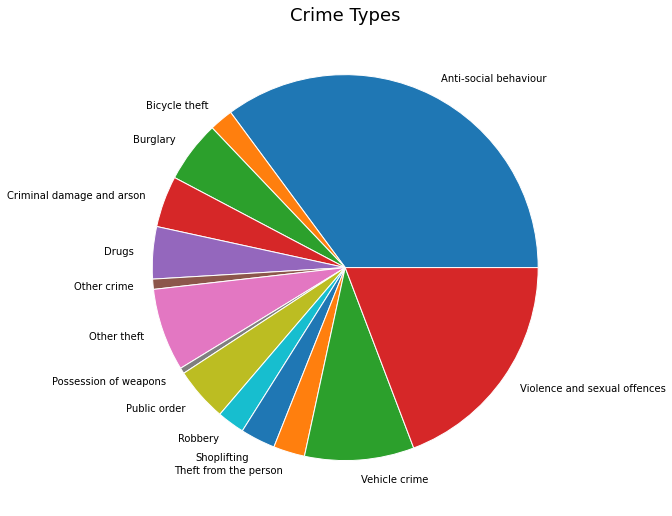

In [9]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(15, 7)
type_counts.plot(kind='pie', ax=ax, wedgeprops={'linewidth': 1.0, 'edgecolor': 'white'}, label='')
plt.tight_layout()
plt.title('Crime Types', fontsize=18)
plt.show()

In [10]:
mountly_counts = merged_df.groupby('Month').size()
mountly_counts

Month
2020-01     90979
2020-02     86984
2020-03     87409
2020-04    109951
2020-05    114008
2020-06    100198
2020-07    103657
2020-08    104782
2020-09     99633
2020-10     99471
2020-11     96914
2020-12     87936
dtype: int64

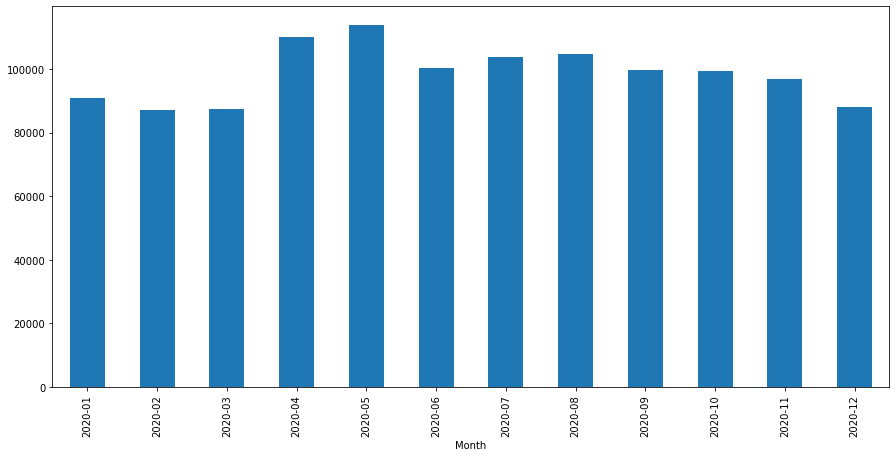

In [11]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(15, 7)
mountly_counts.plot(kind='bar', ax=ax)
plt.show()

In [12]:
counts_by_type = merged_df.groupby(['Month', 'Crime type']).size()
counts_by_type

Month    Crime type                  
2020-01  Anti-social behaviour           17548
         Bicycle theft                    1172
         Burglary                         6889
         Criminal damage and arson        4374
         Drugs                            4282
                                         ...  
2020-12  Robbery                          2021
         Shoplifting                      2690
         Theft from the person            3075
         Vehicle crime                    7758
         Violence and sexual offences    17836
Length: 168, dtype: int64

In [13]:
counts_df = counts_by_type.unstack()
counts_df

Crime type,Anti-social behaviour,Bicycle theft,Burglary,Criminal damage and arson,Drugs,Other crime,Other theft,Possession of weapons,Public order,Robbery,Shoplifting,Theft from the person,Vehicle crime,Violence and sexual offences
Month,,,,,,,,,,,,,,
2020-01,17548,1172,6889,4374,4282,832,9497,562,4025,3263,3853,4256,11975,18451
2020-02,16975,1044,6216,4220,3818,757,9729,452,3842,3152,3845,4570,10405,17959
2020-03,23014,1078,5362,4392,3657,813,7531,483,3966,2711,2996,3414,9621,18371
2020-04,62763,1060,3661,3496,4978,751,3884,460,3464,1101,1691,677,6327,15638
2020-05,58502,1768,3886,3906,6427,823,4443,533,4250,1293,1956,795,7277,18149
2020-06,39584,2548,4320,4353,4665,882,5387,463,4966,1705,2400,1194,8102,19629
2020-07,35588,2833,4928,4692,4569,892,6977,453,5584,2168,3099,2072,8811,20991
2020-08,35842,3019,4995,4710,3534,780,7647,451,5490,2530,3006,2542,8919,21317
2020-09,30863,3078,5195,4274,3541,964,7516,503,5167,2599,3060,2696,9829,20348


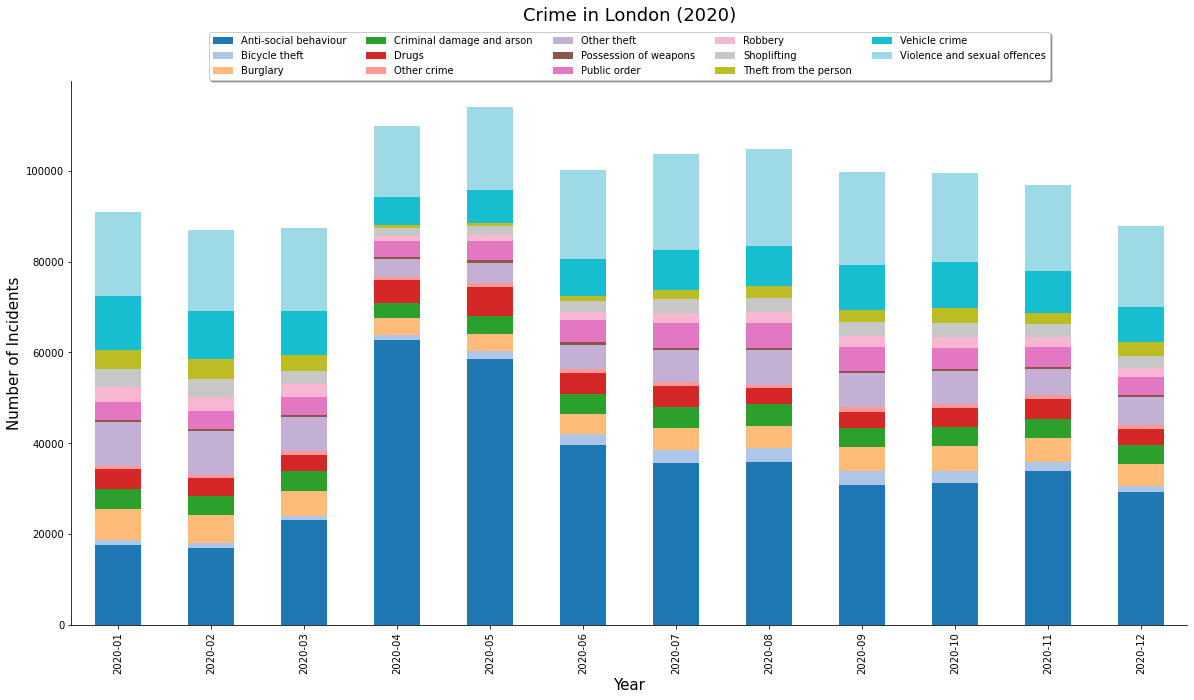

In [25]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(20, 10)
counts_df.plot(kind='bar', stacked=True, ax=ax, colormap='tab20')
plt.legend(loc='upper center', ncol=5, frameon=True, bbox_to_anchor=(0.5, 1.1), fancybox=True, shadow=True)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xlabel('Year', size=15)
plt.ylabel('Number of Incidents', size=15)
plt.title('Crime in London (2020)', size=18, y=1.1)
plt.show()